In [95]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle

In [233]:
def plot_map(my_map, positions=[]):
    # draw the grid frame
    n = len(my_map)
    m = len(my_map[0])
    fig,ax = plt.subplots(figsize=(6, 6))
    
    # draw the whole grid
    for x,row in enumerate(my_map):
        for y,element in enumerate(row):
            if type(element)==type(0) and element == -1:
                ax.add_patch(Rectangle((x,y),1,1,color='lightgray'))
                ax.text(x+0.4,y+0.4,str('X'),c='black',size='xx-large')
            elif type(element)==type('str'):
                if element == 'Rw':
                    ax.add_patch(Rectangle((x,y),1,1,color='red'))
                    ax.text(x+0.35,y+0.4,element,c='black',size='xx-large')
                else:
                    ax.add_patch(Rectangle((x,y),1,1,color='lime'))
                    ax.text(x+0.35,y+0.4,element,c='black',size='xx-large')                   
    
    # draw arrows of start
    if len(positions) > 0:
        ax.add_patch(Circle((positions[0][0]+0.5, positions[0][1]+0.5), 0.05, color='blue'))
        ax.text(positions[0][0]+0.05, positions[0][1]+0.2,'0',c='black',size='small') 
    
    # draw all the movements
    max_num = len(positions)
    for num, pos in enumerate(positions[1:]):
        ax.add_patch(Circle((pos[0]+0.5, pos[1]+0.5), 0.05+0.15*(num+1)/max_num, color='blue'))
        ax.text(pos[0]+0.05+0.9*(num+1)/max_num, pos[1]+0.2,str(num+1),c='black',size='small') 
    
    # some configs
    plt.xticks(np.arange(n+1))
    plt.yticks(np.arange(m+1))

    ax.set_xticklabels([str(x) for x in np.arange(n)])
    ax.set_yticklabels([str(y) for y in np.arange(m)])
    
    plt.grid()
    plt.show()

In [272]:
def move_one_step(my_map, pos, move, pe, n, m):
    # if already stop
    if type(my_map[pos[0]][pos[1]]) == type('str'):
        return pos
    
    # else choose the random action
    actions = [(1-pe)/4] * 5
    actions[move] = pe
    action = np.argmax(np.random.multinomial(1, actions))
    movement = moves_map[action]
    # next pois
    next_pos =[pos[0]+movement[0], pos[1]+movement[1]]
    
    # if not valid: out the map
    if next_pos[0] < 0 or next_pos[0] >= n:
        return pos
    if next_pos[1] < 0 or next_pos[1] >= m:
        return pos
    
    # else if target is obstacle
    if type(my_map[next_pos[0]][next_pos[1]]) == type(0) and my_map[next_pos[0]][next_pos[1]] == -1:
        return pos
    
    return next_pos

def move(my_map, start, moves, pe):
    n = len(my_map)
    m = len(my_map[0])
    positions = [start]
    pos = start
    for move in moves:
        pos = move_one_step(my_map, pos, move, pe, n, m)
        positions.append(pos)
    return positions

In [328]:
my_map = [[0]*5 for _ in range(5)]
my_map[2][0] = 'Rs'
my_map[2][2] = 'Rd'
my_map[1][1] = -1
my_map[2][1] = -1
my_map[1][3] = -1
my_map[2][3] = -1
my_map[4][0] = 'Rw'
my_map[4][1] = 'Rw'
my_map[4][2] = 'Rw'
my_map[4][3] = 'Rw'
my_map[4][4] = 'Rw'

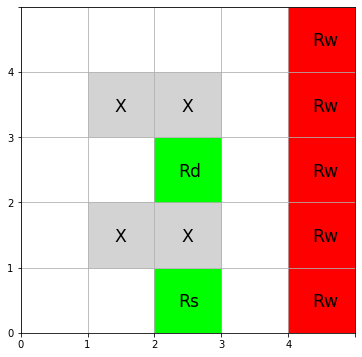

In [329]:
plot_map(my_map)

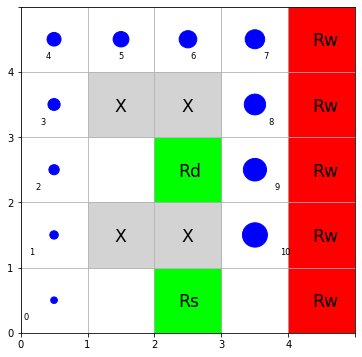

In [333]:
pe = 0.9
start = [0,0]
moves = [2,2,2,2,3,3,3,4,4,4]
plot_map(my_map, move(my_map, start, moves, pe))